# Predicting H1N1 Vaccination Status

**Authors**: Czarina Luna, Weston Shuken, Justin Sohn

January 2022

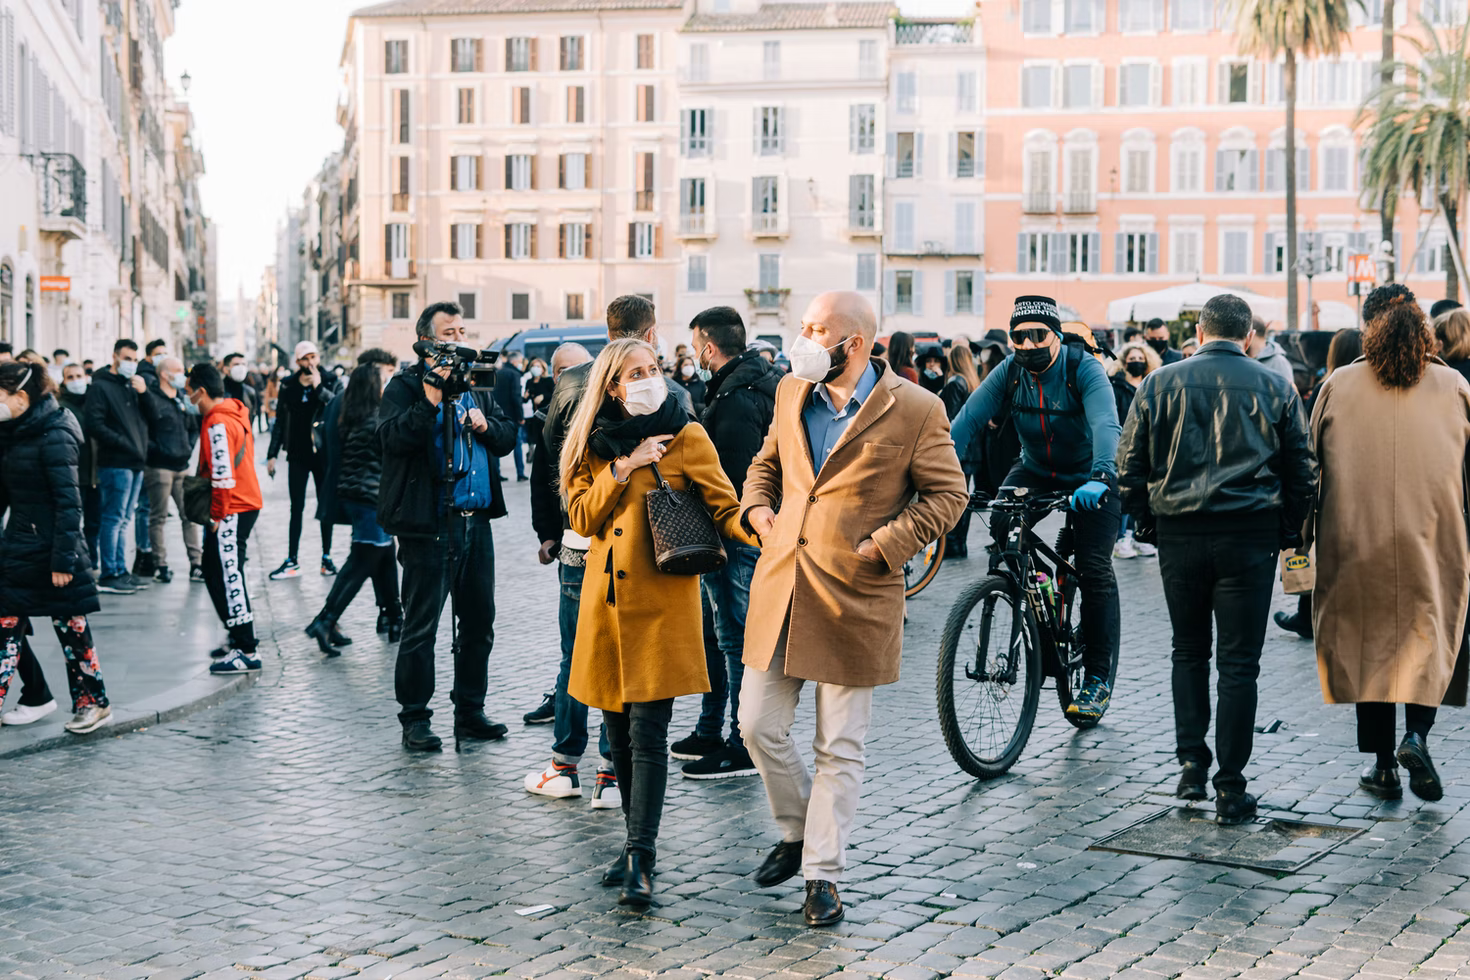

# Table of Contents
* [1 Overview](#Overview)
* [2 Business Problem](#Business_Problem)
* [3 Data Understanding](#Data_Understanding)
* [4 Data Exploration](#Data_Exploration)
* [5 Data Modeling](#Data_Modeling)    
    * [5.1 Baseline Model](#Baseline_Model)
    * [5.2 Machine Learning Pipeline](#Pipeline)
    * [5.3 Hyperparameter Tuning](#Hyperparameter_Tuning)
* [6 Final Model](#Final_Model)
* [7 Final Evaluation](#Final_Evaluation)
* [8 Conclusion](#Conclusion)
* [9 Next Steps](#Next_Steps)
* [10 Contact Us](#Contact)

# 1. Overview <a class="anchor" id="Overview"></a>
A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

# 2. Business Problem <a class="anchor" id="Business_Problem"></a>
Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

# 3. Data Understanding <a class="anchor" id="Data_Understanding"></a>
Describe the data being used for this project.

# 4. Data Exploration <a class="anchor" id="Data_Exploration"></a>
Describe and justify the process for preparing the data for analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
labels = pd.read_csv('data/training_set_labels.csv')
features = pd.read_csv('data/training_set_features.csv')
data = pd.merge(features, labels, on="respondent_id").drop(columns='respondent_id')

In [3]:
target_variable = 'h1n1_vaccine'
other_target = 'seasonal_vaccine'

In [4]:
# Viewing the dataset
data.head(2)

h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0           1.0             0.0                        0.0   
1           3.0             2.0                        0.0   

   behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                   0.0                   0.0                    0.0   
1                   1.0                   0.0                    1.0   

   behavioral_large_gatherings  behavioral_outside_home  \
0                          0.0                      1.0   
1                          0.0                      1.0   

   behavioral_touch_face  doctor_recc_h1n1  ...  rent_or_own  \
0                    1.0               0.0  ...          Own   
1                    1.0               0.0  ...         Rent   

    employment_status  hhs_geo_region                census_msa  \
0  Not in Labor Force        oxchjgsf                   Non-MSA   
1            Employed        bhuqouqj  MSA, Not Principle  City   

   household_adults  household_children  employment_industry  \
0               0.0                 0.0                  NaN   
1               0.0                 0.0             pxcmvdjn   

   employment_occupation  h1n1_vaccine  seasonal_vaccine  
0                    NaN             0                 0  
1               xgwztkwe             0                 1  

[2 rows x 37 columns]

In [5]:
# Taking a look at descriptive statistics
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26615 non-null  float64
 1   h1n1_knowledge               26591 non-null  float64
 2   behavioral_antiviral_meds    26636 non-null  float64
 3   behavioral_avoidance         26499 non-null  float64
 4   behavioral_face_mask         26688 non-null  float64
 5   behavioral_wash_hands        26665 non-null  float64
 6   behavioral_large_gatherings  26620 non-null  float64
 7   behavioral_outside_home      26625 non-null  float64
 8   behavioral_touch_face        26579 non-null  float64
 9   doctor_recc_h1n1             24547 non-null  float64
 10  doctor_recc_seasonal         24547 non-null  float64
 11  chronic_med_condition        25736 non-null  float64
 12  child_under_6_months         25887 non-null  float64
 13  health_worker   

In [6]:
# Taking a look at descriptive statistics
data.describe()

h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
count  26615.000000    26591.000000               26636.000000   
mean       1.618486        1.262532                   0.048844   
std        0.910311        0.618149                   0.215545   
min        0.000000        0.000000                   0.000000   
25%        1.000000        1.000000                   0.000000   
50%        2.000000        1.000000                   0.000000   
75%        2.000000        2.000000                   0.000000   
max        3.000000        2.000000                   1.000000   

       behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
count          26499.000000          26688.000000           26665.000000   
mean               0.725612              0.068982               0.825614   
std                0.446214              0.253429               0.379448   
min                0.000000              0.000000               0.000000   
25%                0.000000              0.000000               1.000000   
50%                1.000000              0.000000               1.000000   
75%                1.000000              0.000000               1.000000   
max                1.000000              1.000000               1.000000   

       behavioral_large_gatherings  behavioral_outside_home  \
count                  26620.00000             26625.000000   
mean                       0.35864                 0.337315   
std                        0.47961                 0.472802   
min                        0.00000                 0.000000   
25%                        0.00000                 0.000000   
50%                        0.00000                 0.000000   
75%                        1.00000                 1.000000   
max                        1.00000                 1.000000   

       behavioral_touch_face  doctor_recc_h1n1  ...  \
count           26579.000000      24547.000000  ...   
mean                0.677264          0.220312  ...   
std                 0.467531          0.414466  ...   
min                 0.000000          0.000000  ...   
25%                 0.000000          0.000000  ...   
50%                 1.000000          0.000000  ...   
75%                 1.000000          0.000000  ...   
max                 1.000000          1.000000  ...   

       opinion_h1n1_vacc_effective  opinion_h1n1_risk  \
count                 26316.000000       26319.000000   
mean                      3.850623           2.342566   
std                       1.007436           1.285539   
min                       1.000000           1.000000   
25%                       3.000000           1.000000   
50%                       4.000000           2.000000   
75%                       5.000000           4.000000   
max                       5.000000           5.000000   

       opinion_h1n1_sick_from_vacc  opinion_seas_vacc_effective  \
count                 26312.000000                 26245.000000   
mean                      2.357670                     4.025986   
std                       1.362766                     1.086565   
min                       1.000000                     1.000000   
25%                       1.000000                     4.000000   
50%                       2.000000                     4.000000   
75%                       4.000000                     5.000000   
max                       5.000000                     5.000000   

       opinion_seas_risk  opinion_seas_sick_from_vacc  household_adults  \
count       26193.000000                 26170.000000      26458.000000   
mean            2.719162                     2.118112          0.886499   
std             1.385055                     1.332950          0.753422   
min             1.000000                     1.000000          0.000000   
25%             2.000000                     1.000000          0.000000   
50%             2.000000                     2.000000          1.000000   
75%             4.00

In [7]:
# Taking a further look at datatypes and null-values
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26615 non-null  float64
 1   h1n1_knowledge               26591 non-null  float64
 2   behavioral_antiviral_meds    26636 non-null  float64
 3   behavioral_avoidance         26499 non-null  float64
 4   behavioral_face_mask         26688 non-null  float64
 5   behavioral_wash_hands        26665 non-null  float64
 6   behavioral_large_gatherings  26620 non-null  float64
 7   behavioral_outside_home      26625 non-null  float64
 8   behavioral_touch_face        26579 non-null  float64
 9   doctor_recc_h1n1             24547 non-null  float64
 10  doctor_recc_seasonal         24547 non-null  float64
 11  chronic_med_condition        25736 non-null  float64
 12  child_under_6_months         25887 non-null  float64
 13  health_worker   

## Tighten up imbalance code

In [8]:
# Viewing the balance within the target class
round(data['h1n1_vaccine'].value_counts(normalize=True)*100, 2)

0    78.75
1    21.25
Name: h1n1_vaccine, dtype: float64

In [9]:
round(data['seasonal_vaccine'].value_counts(normalize=True)*100, 2) 

0    53.44
1    46.56
Name: seasonal_vaccine, dtype: float64

In [10]:
# class imbalance table seasonal
imbalance_table = pd.DataFrame(data['seasonal_vaccine'].value_counts(normalize=False))
imbalance_table['percent'] = round(data['seasonal_vaccine'].value_counts(normalize=True), 2)*100
imbalance_table['inoculated'] = 'yes'
imbalance_table.at[0, 'inoculated'] = 'no'
imbalance_table

seasonal_vaccine  percent inoculated
0             14272     53.0         no
1             12435     47.0        yes

In [11]:
# class imbalance table h1n1
imbalance_table = pd.DataFrame(data['h1n1_vaccine'].value_counts(normalize=False))
imbalance_table['percent'] = round(data['h1n1_vaccine'].value_counts(normalize=True), 4)*100
imbalance_table['inoculated'] = 'yes'
imbalance_table.at[0, 'inoculated'] = 'no'
imbalance_table

h1n1_vaccine  percent inoculated
0         21033    78.75         no
1          5674    21.25        yes

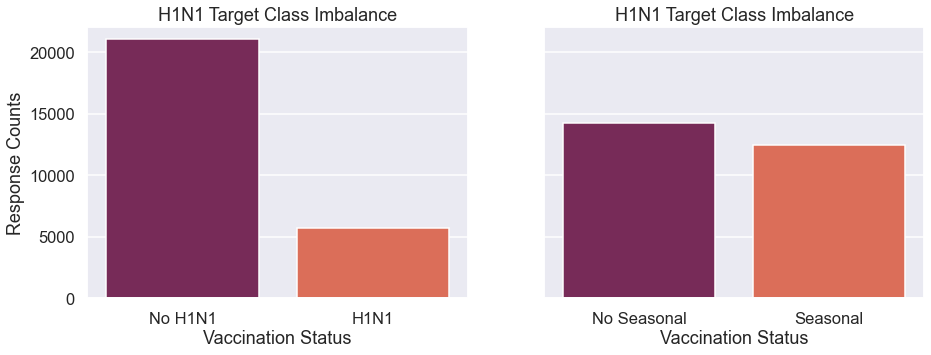

In [12]:
# Class imbalance graph
no_h1n1 = data['h1n1_vaccine'].value_counts(normalize=False)[0]
yes_h1n1 = data['h1n1_vaccine'].value_counts(normalize=False)[1]
no_seas = data['seasonal_vaccine'].value_counts(normalize=False)[0]
yes_seas = data['seasonal_vaccine'].value_counts(normalize=False)[1]

sns.set_theme(style="darkgrid", context="talk")
fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(15, 5), sharey=True)
sns.barplot(x=['No H1N1', 'H1N1'], y=[no_h1n1, yes_h1n1], palette="rocket", ax=ax1)
sns.barplot(x=['No Seasonal', 'Seasonal'], y=[no_seas, yes_seas], palette="rocket", ax=ax2)
ax1.set_ylabel('Response Counts')
ax1.set_xlabel('Vaccination Status')
ax2.set_xlabel('Vaccination Status')
ax1.set_title('H1N1 Target Class Imbalance')
ax2.set_title('H1N1 Target Class Imbalance');

### EDA Takeaways:
- An issue at stake is the massive amount of NaN or Null values in the data. 
- The target variable `seasonal_vaccine` also is imbalanced (47/53).
- The target variable `h1n1_vaccine` also is imbalanced (22/78).

# 5. Data Modeling <a class="anchor" id="Data_Modeling"></a>

In [13]:
import time

from sklearn.preprocessing import FunctionTransformer, StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,plot_confusion_matrix, roc_auc_score, plot_roc_curve, roc_curve, PrecisionRecallDisplay, precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.feature_selection import SelectFromModel

import eli5
from eli5.sklearn import PermutationImportance

from pdpbox import pdp

import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

## 5.1 Baseline Model <a class="anchor" id="Baseline_Model"></a>
Our basline model uses logistic regression, drops all NaN/Null values, and uses only numeric features.

In [14]:
def grab_numeric(df):
    return df.select_dtypes(['float64', 'int64'])

In [15]:
def data_split(df=data, target=target_variable):
    X = df.drop(columns=target)
    y = df[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=20211122, stratify=y)
    return X_train, X_test, y_train, y_test

In [16]:
baseline_data = grab_numeric(data.drop(columns=other_target)).dropna()

X_train, X_test, y_train, y_test = data_split(baseline_data)

In [17]:
baseline_model = LogisticRegression(random_state=20220121)

baseline_model.fit(X_train, y_train)

baseline_pred = baseline_model.predict(X_test)

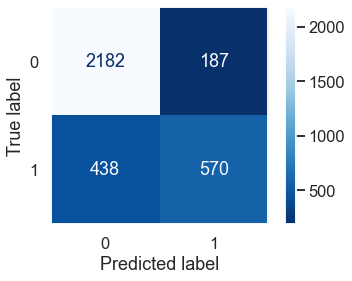

In [18]:
plot_confusion_matrix(baseline_model, X_test, y_test, cmap='Blues_r')
plt.grid(False)
plt.show()

In [19]:
print(f"""
Our baseline model's accuracy on the test set is {round(accuracy_score(y_test, baseline_pred), 2)}.
Our baseline model's recall on the test set is {round(recall_score(y_test, baseline_pred), 2)}.
Our baseline model's precision on the test set is {round(precision_score(y_test, baseline_pred), 2)}.
Our baseline model's f1-score on the test is {round(f1_score(y_test, baseline_pred), 2)}.
""")


Our baseline model's accuracy on the test set is 0.81.
Our baseline model's recall on the test set is 0.57.
Our baseline model's precision on the test set is 0.75.
Our baseline model's f1-score on the test is 0.65.



## 5.2 Machine Learning Pipeline <a class="anchor" id="Pipeline"></a>
Building a pipeline for an efficient workflow. The pipeline will include catergorical and numeric transformations, standardization of features, mean value for NaN/Null.
The estimators for the pipeline are:
* Logistic Regression
* Decision Tree
* Random Forest
* Extra Trees
* Gradient Boost

In [20]:
GrabNumeric = FunctionTransformer(grab_numeric)

numeric_transformer = Pipeline(
    steps=[('grab_num', GrabNumeric), 
           ('num_impute', SimpleImputer(strategy='median', add_indicator=True)), 
           ('scaler', StandardScaler())])

categorical_transformer = Pipeline(
    steps=[('cat_impute', SimpleImputer(strategy='most_frequent')),
           ('ohe', OneHotEncoder(sparse=False, handle_unknown='ignore'))])

num_features = list(range(0, 21)) + [31, 32]
cat_features = list(range(21, 31)) + [33, 34]

preprocessor = ColumnTransformer(
    transformers=[("num", numeric_transformer, num_features),
                  ("cat", categorical_transformer, cat_features)], remainder='passthrough')

In [21]:
baseline = {'LogisticRegression':
              {'classifier': LogisticRegression(random_state=20220124, max_iter=1000),
               'preprocessor': preprocessor,
               'output': None,
               'fit_classifier': None,
               'time_ran' : None
              },
          'DecisionTree':
              {'classifier': DecisionTreeClassifier(random_state=20211122),
               'preprocessor': preprocessor,
               'output': None,
               'fit_classifier': None,
               'time_ran': None
              },
          'RandomForest':
              {'classifier': RandomForestClassifier(random_state=10151997),
               'preprocessor': preprocessor,
               'output': None,
               'fit_classifier': None,
               'time_ran': None
              },
          'ExtraTrees':
              {'classifier': ExtraTreesClassifier(random_state=20220125),
                'preprocessor': preprocessor,
                'output': None,
                'fit_classifier': None,
                'time_ran': None
              },
          'GradientBoost':
              {'classifier': GradientBoostingClassifier(random_state=20220126),
               'preprocessor': preprocessor,
               'output': None,
               'fit_classifier': None,
               'time_ran': None
              }
         }

In [22]:
def run_models(models, df=data, target=target_variable):
    """
    Takes in dict of models to run, df of dataset, string name of target
    Prints every model in dict, its accuracy, precision, auc scores, and time it took to ran 
    """
    X_train, X_test, y_train, y_test = data_split(df, target)
    
    metric_table = pd.DataFrame(columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'AUC'])
    
    for name, model in models.items():
        print(name, 'Model:')
        
        X_train_processed = model['preprocessor'].fit_transform(X_train)
        X_test_processed = model['preprocessor'].transform(X_test)
        model['fit_classifier'] = model['classifier'].fit(X_train_processed, y_train)
        y_pred = model['fit_classifier'].predict(X_test_processed)
        model['output'] = [model['fit_classifier'].score(X_test_processed, y_test), 
                           precision_score(y_test, y_pred), 
                           recall_score(y_test, y_pred),
                           roc_auc_score(y_test, model['fit_classifier'].predict_proba(X_test_processed)[:,1])]
        
        model['time_ran'] = time.asctime()
        print(model, '\n')
        
        metric_table = metric_table.append({'Model': name, 'Accuracy': model['output'][0], 
                                            'Precision': model['output'][1], 'Recall': model['output'][2],
                                            'AUC': model['output'][3]}, ignore_index=True) 
        
    return metric_table

In [23]:
model_metrics = run_models(baseline)
model_metrics

LogisticRegression Model:
{'classifier': LogisticRegression(max_iter=1000, random_state=20220124), 'preprocessor': ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('grab_num',
                                                  FunctionTransformer(func=<function grab_numeric at 0x7fb023e90ca0>)),
                                                 ('num_impute',
                                                  SimpleImputer(add_indicator=True,
                                                                strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                  14, 15, 16, 17, 18, 19, 20, 31, 32]),
                                ('cat',
                                 Pipeline(steps=[('cat_impute',
                                                  

Model  Accuracy  Precision    Recall       AUC
0  LogisticRegression  0.874495   0.760072  0.598309  0.899066
1        DecisionTree  0.806799   0.544391  0.557435  0.715766
2        RandomForest  0.868654   0.813657  0.495419  0.894567
3          ExtraTrees  0.871200   0.807481  0.517266  0.898905
4       GradientBoost  0.876891   0.776645  0.590557  0.903474

### Cleanup Graphing (Weston)

In [24]:
# def roc_metrics(model, data, target):
#     """
#     Returns false-positive rate, true positive rate, threshold.
#     """
#     X_train, X_test, y_train, y_test = data_split(data, target)

#     X_train_processed = model['preprocessor'].fit_transform(X_train)
#     X_test_processed = model['preprocessor'].transform(X_test)
#     model['fit_regressor'] = model['regressor'].fit(X_train_processed, y_train)
#     model['output'] = [model['fit_regressor'].score(X_test_processed, y_test), 
#                        precision_score(y_test, model['regressor'].predict(X_test_processed)), 
#                        roc_auc_score(y_test, model['regressor'].predict_proba(X_test_processed)[:,1])]
#     model['time_ran'] = time.asctime()
#     y_score = model['regressor'].predict(X_test_processed)
    
#     fpr, tpr, threshold = roc_curve(y_test, y_score)
#     return fpr, tpr, threshold

In [25]:
# def pr_metrics(model, data, target):
#     """
#     Returns precision & recall.
#     """
#     X_train, X_test, y_train, y_test = data_split(data, target)

#     X_train_processed = model['preprocessor'].fit_transform(X_train)
#     X_test_processed = model['preprocessor'].transform(X_test)
#     model['fit_regressor'] = model['regressor'].fit(X_train_processed, y_train)
#     model['output'] = [model['fit_regressor'].score(X_test_processed, y_test), 
#                        precision_score(y_test, model['regressor'].predict(X_test_processed)), 
#                        roc_auc_score(y_test, model['regressor'].predict_proba(X_test_processed)[:,1])]
#     model['time_ran'] = time.asctime()
#     y_score = model['regressor'].predict(X_test_processed)
    
#     precision, recall, _ = precision_recall_curve(y_test, y_score)
#     return precision, recall

In [26]:
# pr_dict = {'precision': [], 'recall': [], 'name': []}
# for model in models:
#     precision, recall = pr_metrics(models[model], data, 'h1n1_vaccine')
#     pr_dict['precision'].append(precision)
#     pr_dict['recall'].append(recall)
#     pr_dict['name'].append(model)

In [27]:
# fig, ax = plt.subplots(figsize=(12, 10))

# colors = ["aqua", "darkorange", "cornflowerblue", 'green', 'yellow']

# for i, color in zip(range(5), colors):
#     display = PrecisionRecallDisplay(
#         recall=pr_dict['recall'][i],
#         precision=pr_dict['precision'][i],
#     )
#     display.plot(ax=ax, name=f"Precision-recall for class {pr_dict['name'][i]}", color=color)

In [28]:
# initally commented out
# fig, ax = plt.subplots(figsize=(12, 10))

# colors = ["aqua", "darkorange", "cornflowerblue", 'green', 'yellow']
# for i, color in zip(range(5), colors):
#     plt.plot(
#         pr_dict['precision'][i],
#         pr_dict['recall'][i],
#         color=color,
#         lw=2,
#         label=pr_dict['name'][i]
#     )

# plt.plot([1, 0], [0, 1], "k--", lw=2)
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.0])
# plt.xlabel("Precision")
# plt.ylabel("Recall")
# plt.title("P/R")
# plt.legend(loc="lower left")
# plt.show()

# # disp = PrecisionRecallDisplay(precision=pr_dict['precision'][0], recall=pr_dict['recall'][0])
# #     disp.plot()

# #     plt.show()

In [29]:
# roc_dict = {'fpr': [], 'tpr': [], 'name': []}
# for model in models:
#     fpr, tpr, threshold = roc_metrics(models[model], data, 'h1n1_vaccine')
#     roc_dict['fpr'].append(fpr)
#     roc_dict['tpr'].append(tpr)
#     roc_dict['name'].append(model)

In [30]:
# fig, ax = plt.subplots(figsize=(12, 10))

# colors = ["aqua", "darkorange", "cornflowerblue", 'green', 'yellow']
# for i, color in zip(range(5), colors):
#     plt.plot(
#         roc_dict['fpr'][i],
#         roc_dict['tpr'][i],
#         color=color,
#         lw=2,
#         label=roc_dict['name'][i]
#     )


# plt.plot([0, 1], [0, 1], "k--", lw=2)
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel("False Positive Rate")
# plt.ylabel("True Positive Rate")
# plt.title("ROC Curve")
# plt.legend(loc="lower right")
# plt.show()

## 5.3 Hyperparameter Tuning <a class="anchor" id="Hyperparameter_Tuning"></a>

### Bringing in stored variables from our GridSearch.iypnb file that contain the best params

In [31]:
def tune_hyperparameters(models, classifier, name, params):
    best_params = {}
    for param, values in params.items():
        parameter = param.replace('classifier__', '')
        best_params[parameter] = values
    models[name]['classifier'] = classifier(**best_params)

In [32]:
tuned_models = baseline.copy()

#### Optimize Logistic Regression

In [33]:
%store -r lr_best_params

In [34]:
tune_hyperparameters(tuned_models, LogisticRegression, 'LogisticRegression', lr_best_params)

#### Optimize Decision Tree

In [35]:
%store -r dt_best_params

In [36]:
tune_hyperparameters(tuned_models, DecisionTreeClassifier, 'DecisionTree', dt_best_params)

#### Optimize Random Forest

In [37]:
%store -r rf_best_params

In [38]:
tune_hyperparameters(tuned_models, RandomForestClassifier, 'RandomForest', rf_best_params)

#### Optimize Extra Trees

In [39]:
%store -r et_best_params

In [40]:
tune_hyperparameters(tuned_models, ExtraTreesClassifier, 'ExtraTrees', et_best_params)

#### Optimize Gradient Boost

In [41]:
%store -r gb_best_params

In [42]:
tune_hyperparameters(tuned_models, GradientBoostingClassifier, 'GradientBoost', gb_best_params)

## Training Tuned Models

In [43]:
tuned_model_metrics = run_models(tuned_models)
tuned_model_metrics

LogisticRegression Model:
{'classifier': LogisticRegression(C=0.001), 'preprocessor': ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('grab_num',
                                                  FunctionTransformer(func=<function grab_numeric at 0x7fb023e90ca0>)),
                                                 ('num_impute',
                                                  SimpleImputer(add_indicator=True,
                                                                strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                  14, 15, 16, 17, 18, 19, 20, 31, 32]),
                                ('cat',
                                 Pipeline(steps=[('cat_impute',
                                                  SimpleImputer(strategy='most_

Model  Accuracy  Precision    Recall       AUC
0  LogisticRegression  0.859668   0.806616  0.446794  0.887411
1        DecisionTree  0.867905   0.723192  0.613108  0.888087
2        RandomForest  0.805302   0.928058  0.090909  0.879349
3          ExtraTrees  0.829115   0.883978  0.225511  0.886320
4       GradientBoost  0.827318   0.886628  0.214940  0.877325

In [44]:
all_models = pd.concat([model_metrics, tuned_model_metrics], ignore_index=True)
all_models['type'] = 'baseline'
all_models.loc[5:9, 'type'] = 'tuned'

In [45]:
all_models

Model  Accuracy  Precision    Recall       AUC      type
0  LogisticRegression  0.874495   0.760072  0.598309  0.899066  baseline
1        DecisionTree  0.806799   0.544391  0.557435  0.715766  baseline
2        RandomForest  0.868654   0.813657  0.495419  0.894567  baseline
3          ExtraTrees  0.871200   0.807481  0.517266  0.898905  baseline
4       GradientBoost  0.876891   0.776645  0.590557  0.903474  baseline
5  LogisticRegression  0.859668   0.806616  0.446794  0.887411     tuned
6        DecisionTree  0.867905   0.723192  0.613108  0.888087     tuned
7        RandomForest  0.805302   0.928058  0.090909  0.879349     tuned
8          ExtraTrees  0.829115   0.883978  0.225511  0.886320     tuned
9       GradientBoost  0.827318   0.886628  0.214940  0.877325     tuned

In [46]:
# PR GRAPH

In [47]:
# pr_dict = {'precision': [], 'recall': [], 'name': []}
# for model in models:
#     precision, recall = pr_metrics(models[model], data, 'h1n1_vaccine')
#     pr_dict['precision'].append(precision)
#     pr_dict['recall'].append(recall)
#     pr_dict['name'].append(model)

In [48]:
# fig, ax = plt.subplots(figsize=(12, 10))

# colors = ["aqua", "darkorange", "cornflowerblue", 'green', 'yellow']

# for i, color in zip(range(5), colors):
#     display = PrecisionRecallDisplay(
#         recall=pr_dict['recall'][i],
#         precision=pr_dict['precision'][i],
#     )
#     display.plot(ax=ax, name=f"{pr_dict['name'][i]}", color=color)
#     plt.legend(loc="upper right")

In [49]:
# roc_dict = {'fpr': [], 'tpr': [], 'name': []}
# for model in models:
#     fpr, tpr, threshold = roc_metrics(models[model], data, 'h1n1_vaccine')
#     roc_dict['fpr'].append(fpr)
#     roc_dict['tpr'].append(tpr)
#     roc_dict['name'].append(model)

In [50]:
# fig, ax = plt.subplots(figsize=(12, 10))

# colors = ["aqua", "darkorange", "cornflowerblue", 'green', 'yellow']
# for i, color in zip(range(5), colors):
#     plt.plot(
#         roc_dict['fpr'][i],
#         roc_dict['tpr'][i],
#         color=color,
#         lw=2,
#         label=roc_dict['name'][i]
#     )


# plt.plot([0, 1], [0, 1], "k--", lw=2)
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel("False Positive Rate")
# plt.ylabel("True Positive Rate")
# plt.title("ROC Curve")
# plt.legend(loc="lower right")
# plt.show()

In [51]:
# initially commented out
# # Graph metric table AUC improvement
# fig, ax = plt.subplots(figsize=(10, 8))
# sns.barplot(x=df_models.index, y=df_models['AUC'])
# ax.set_ylim(.4, 1);

In [52]:
# labels = list(df_models['Model'])
# perc = list(df_models['Precision'])
# AUC = list(df_models['AUC'])

# x = np.arange(len(labels))  # the label locations
# width = 0.35  # the width of the bars

# fig, ax = plt.subplots(figsize=(12,6))
# rects1 = ax.bar(x - width/2, perc, width, label='Precision')
# rects2 = ax.bar(x + width/2, AUC, width, label='AUC')

# # Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_ylabel('Scores')
# ax.set_title('Precision and AUC')
# ax.set_ylim(.4, 1)

# ax.legend()
# plt.show()

In [53]:
# fig, ax1 = plt.subplots(figsize=(12,6), sharey=True)

# ax1.bar(data=df_models, x=df_models.index, height='Precision', color='b', label='Precision')
# ax2 = ax1.twinx()
# ax2.plot(df_models.index, df_models['AUC'], color='r', label='AUC')
# ax2.grid(False)
# ax2.legend()
# plt.show();

In [54]:
# ax1 = sns.set_style(style='darkgrid')
# fig, ax1 = plt.subplots(figsize=(12,6), sharey=True)

# ax.bar(data=df_models, x=df_models.index, y='Precision', ax=ax1)
# ax2 = ax1.twinx()
# ax.plot(data=df_models, x=df_models.index, y='AUC', marker='o', sort = False, ax=ax2);


In [55]:
# # Graph metric table Precision improvement
# # Add line w/ Accuracy/AUC
# fig, ax = plt.subplots(figsize=(10, 8))
# sns.barplot(x=df_models.index, y=df_models['Precision'])
# ax.set_ylim(.4, 1);

In [56]:
# # Graph metric table Accuracy improvement
# fig, ax = plt.subplots(figsize=(10, 8))
# sns.barplot(x=df_models.index, y=df_models['Accuracy'])
# ax.set_ylim(.4, 1);

In [57]:
### Graph showing all (good) models, sky graph, auc (stacked together)

In [58]:
# Show metric table with all 
all_models.sort_values(['Precision'], ascending=False)

Model  Accuracy  Precision    Recall       AUC      type
7        RandomForest  0.805302   0.928058  0.090909  0.879349     tuned
9       GradientBoost  0.827318   0.886628  0.214940  0.877325     tuned
8          ExtraTrees  0.829115   0.883978  0.225511  0.886320     tuned
2        RandomForest  0.868654   0.813657  0.495419  0.894567  baseline
3          ExtraTrees  0.871200   0.807481  0.517266  0.898905  baseline
5  LogisticRegression  0.859668   0.806616  0.446794  0.887411     tuned
4       GradientBoost  0.876891   0.776645  0.590557  0.903474  baseline
0  LogisticRegression  0.874495   0.760072  0.598309  0.899066  baseline
6        DecisionTree  0.867905   0.723192  0.613108  0.888087     tuned
1        DecisionTree  0.806799   0.544391  0.557435  0.715766  baseline

# 6. Final Model <a class="anchor" id="Final_Model"></a>

In [59]:
numeric_imputer = Pipeline(
    steps=[('grab_num', GrabNumeric), 
           ('num_impute', SimpleImputer(strategy='median'))])

categorical_imputer = Pipeline(
    steps=[('cat_impute', SimpleImputer(strategy='most_frequent'))])

final_preprocessor = ColumnTransformer(
    transformers=[("num", numeric_imputer, num_features),
                  ("cat", categorical_imputer, cat_features)], remainder='passthrough')

In [60]:
X_train, X_test, y_train, y_test = data_split(data.drop(columns=other_target))

final_preprocessor.fit(X_train, y_train)

X_train_processed = pd.DataFrame(final_preprocessor.transform(X_train), columns=X_train.columns)
X_test_processed = pd.DataFrame(final_preprocessor.transform(X_test), columns=X_test.columns)

In [61]:
X_train_processed = pd.get_dummies(X_train_processed, drop_first=True)
X_test_processed = pd.get_dummies(X_test_processed, drop_first=True)

In [62]:
final_model = tuned_models['RandomForest']['classifier']

final_model.fit(X_train_processed, y_train)

RandomForestClassifier(max_depth=4, min_samples_split=10, n_estimators=250)

In [63]:
# Permutation Importance
# feature_names = [col for col in X_test.columns]

perm = PermutationImportance(final_model, random_state=20211122)
perm.fit(X_test_processed, y_test)

eli5.show_weights(perm, feature_names = X_test_processed.columns.tolist())

In [64]:
perm_df = pd.DataFrame(dict(feature_names=X_test_processed.columns.tolist(),
                            feat_imp=perm.feature_importances_, 
                            std=perm.feature_importances_std_))
perm_df = perm_df.round(4)
perm_df.sort_values('feat_imp', ascending=False).loc[perm_df['feat_imp'] >= 0.0010]

feature_names  feat_imp     std
12             doctor_recc_h1n1_1.0    0.0053  0.0005
21  opinion_h1n1_vacc_effective_5.0    0.0048  0.0004
25            opinion_h1n1_risk_5.0    0.0030  0.0003
13         doctor_recc_seasonal_1.0    0.0029  0.0003
33  opinion_seas_vacc_effective_5.0    0.0025  0.0002
4                h1n1_knowledge_2.0    0.0024  0.0004
16                health_worker_1.0    0.0023  0.0005
37            opinion_seas_risk_5.0    0.0018  0.0002
24            opinion_h1n1_risk_4.0    0.0015  0.0002
36            opinion_seas_risk_4.0    0.0010  0.0003

In [65]:
perm_results = pd.DataFrame(data=perm.results_, columns=X_test_processed.columns)
feat_imps = perm_results.mean().sort_values(ascending=False)
perm_results = perm_results[feat_imps.index]

fig = px.box(perm_results.melt(), x='variable', y='value', orientation='v', title='Top Features')
fig.add_trace(go.Scatter(x=feat_imps.index, y=feat_imps.values, mode='markers', marker=dict(color='red'), name = 'Mean'))

fig

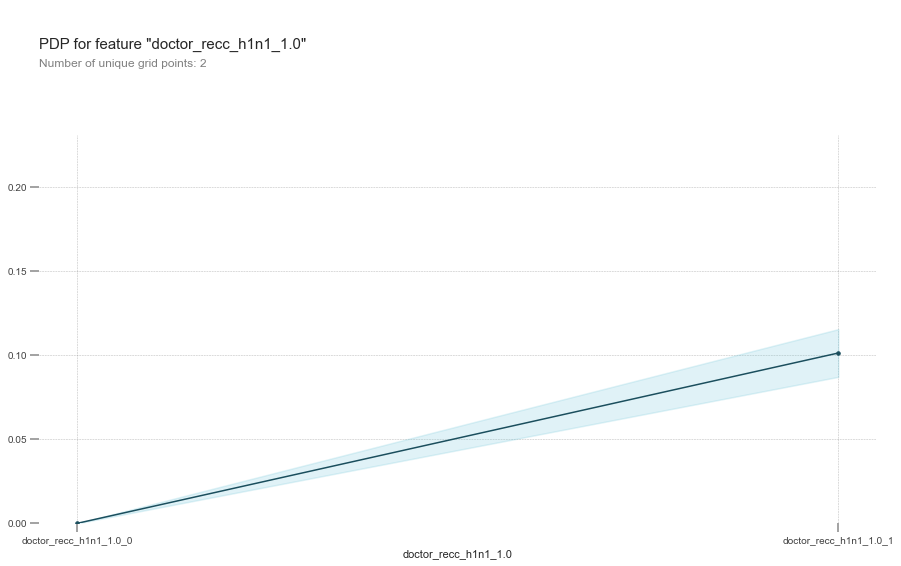

In [66]:
# Partial Dependency Plot
pdp_doctor = pdp.pdp_isolate(tuned_models['RandomForest']['classifier'], X_test_processed, model_features=[col for col in X_test_processed.columns], feature='doctor_recc_h1n1_1.0')

pdp.pdp_plot(pdp_doctor, 'doctor_recc_h1n1_1.0')

plt.show()

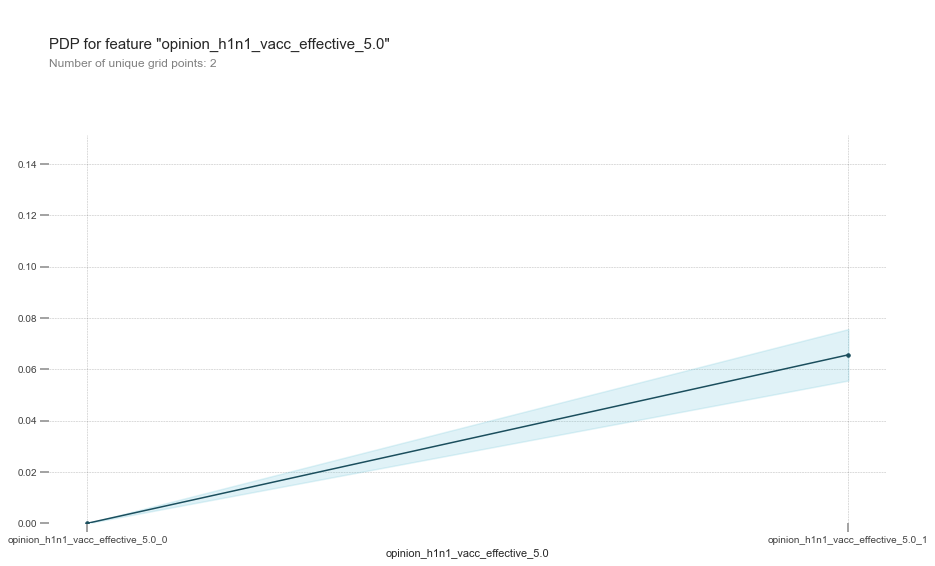

In [67]:
pdp_opinion = pdp.pdp_isolate(tuned_models['RandomForest']['classifier'], X_test_processed, model_features=[col for col in X_test_processed.columns], feature='opinion_h1n1_vacc_effective_5.0')

pdp.pdp_plot(pdp_opinion, 'opinion_h1n1_vacc_effective_5.0')

plt.show()

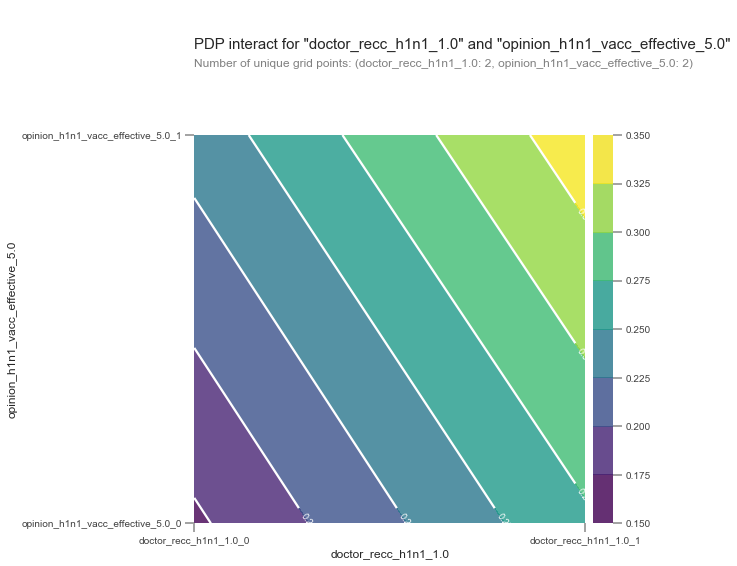

In [68]:
features_to_plot = ['doctor_recc_h1n1_1.0', 'opinion_h1n1_vacc_effective_5.0']
inter1  =  pdp.pdp_interact(tuned_models['RandomForest']['classifier'], X_test_processed, model_features=[col for col in X_test_processed.columns], features=features_to_plot)

pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=features_to_plot, plot_type='contour')
plt.show()

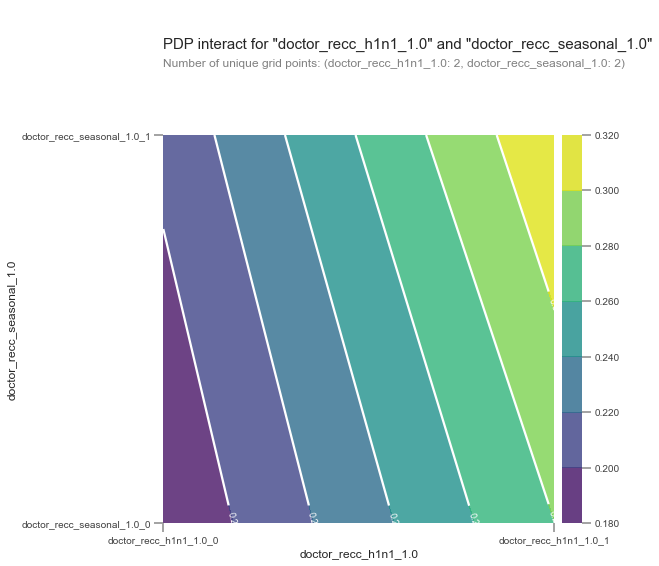

In [69]:
features_to_plot2 = ['doctor_recc_h1n1_1.0', 'doctor_recc_seasonal_1.0']
inter2  =  pdp.pdp_interact(tuned_models['RandomForest']['classifier'], X_test_processed, model_features=[col for col in X_test_processed.columns], features=features_to_plot2)

pdp.pdp_interact_plot(pdp_interact_out=inter2, feature_names=features_to_plot2, plot_type='contour')
plt.show()

# 7. Final Evaluation <a class="anchor" id="Final_Evaluation"></a>

In [70]:
# Run test set on final model
final_pred = final_model.predict(X_test_processed)

In [71]:
# # Confusion Matrix (test)
# plot_confusion_matrix(final_model, X_test_processed, y_test, cmap='Blues_r')
# plt.grid(False)
# plt.show()

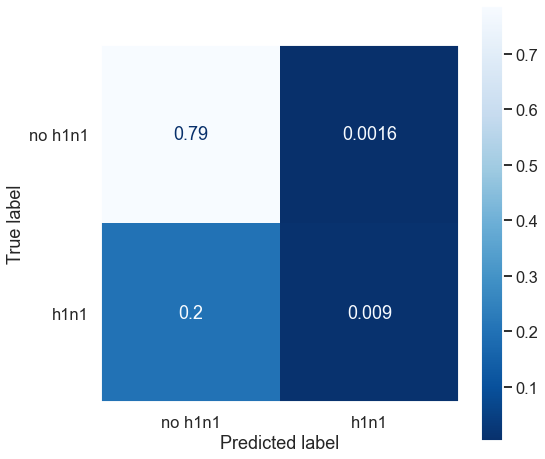

In [72]:
fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(final_model, X_test_processed, y_test, cmap='Blues_r', display_labels=['no h1n1', 'h1n1'], ax=ax, normalize='all')
plt.grid(False)
plt.show()

In [73]:
print(f"""
Our final model's accuracy on the test set is {round(accuracy_score(y_test, final_pred), 2)}.
Our final model's recall on the test set is {round(recall_score(y_test, final_pred), 2)}.
Our final model's precision on the test set is {round(precision_score(y_test, final_pred), 2)}.
Our final model's f1-score on the test is {round(f1_score(y_test, final_pred), 2)}.
""")


Our final model's accuracy on the test set is 0.79.
Our final model's recall on the test set is 0.04.
Our final model's precision on the test set is 0.85.
Our final model's f1-score on the test is 0.08.



Evaluate how well your work solves the stated business problem.

Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?

# 8. Conclusion <a class="anchor" id="Conclusion"></a>
Provide your conclusions about the work you've done, including any limitations or next steps.

Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?

# 9. Next Steps <a class="anchor" id="Next_Steps"></a>

# 10. Contact Us <a class="anchor" id="Contact"></a>

Any inquiries, please contact the contributors of this analysis:   
>[Czarina Luna](https://www.linkedin.com/in/czarinagluna)  
[Justin Sohn](https://www.linkedin.com/in/justin-sohn-689901193/)  
[Weston Shuken](https://www.linkedin.com/in/westonshuken/)